In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amits\Downloads\Customers_Data.csv", encoding='latin-1')

In [3]:
df.head()

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y


In [4]:
# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18018 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [6]:
df.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [7]:
mode=df['Prefix'].mode()[0]

In [8]:
df['Prefix'].fillna(mode, inplace=True)

In [9]:
mode=df['Gender'].mode()[0]

In [10]:
df['Gender'].fillna(mode, inplace=True)

In [11]:
df['full_name']= (df['Prefix']+ ' ' + df['FirstName']+ ' ' +df['LastName'])

In [12]:
df.drop(columns=['Prefix','FirstName','LastName'], axis=1,inplace=True)

In [13]:
df.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,full_name
0,11000,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y,MR. JON YANG
1,11001,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N,MR. EUGENE HUANG
2,11002,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y,MR. RUBEN TORRES
3,11003,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N,MS. CHRISTY ZHU
4,11004,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y,MRS. ELIZABETH JOHNSON


In [14]:
df.shape

(18148, 11)

In [15]:
df.isnull().sum()

CustomerKey       0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
full_name         0
dtype: int64

In [16]:
df.describe()

,CustomerKey,TotalChildren
count,18148.000000,18148.000000
mean,20247.470465,1.843619
std,5336.245656,1.613203
min,11000.000000,0.000000
25%,15626.750000,0.000000
50%,20252.500000,2.000000
75%,24868.250000,3.000000
max,29483.000000,5.000000


In [17]:
df = df.drop('CustomerKey', axis=1)

In [18]:
# Exploaratory Data Analysis

In [19]:
df['MaritalStatus'].value_counts()

MaritalStatus
M    9817
S    8331
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MaritalStatus'>

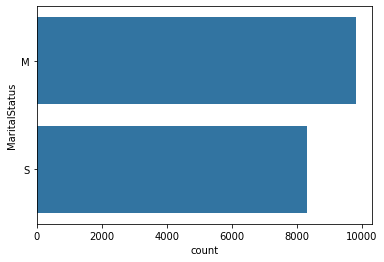

In [20]:
sns.countplot(df['MaritalStatus'])

In [21]:
df['Gender'].value_counts()

Gender
M    9256
F    8892
Name: count, dtype: int64

<Axes: xlabel='Gender'>

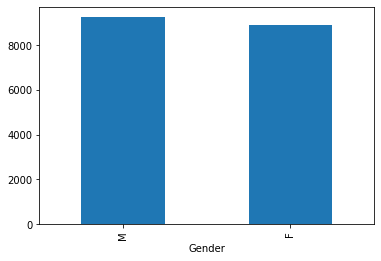

In [22]:
df['Gender'].value_counts().plot(kind = 'bar')

In [23]:
df['TotalChildren'].value_counts()

TotalChildren
0    5080
2    3703
1    3552
4    2259
3    2153
5    1401
Name: count, dtype: int64

<Axes: xlabel='TotalChildren'>

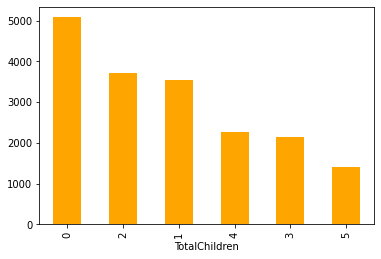

In [24]:
df['TotalChildren'].value_counts().plot(kind = 'bar', color = 'orange')

<Axes: xlabel='HomeOwner'>

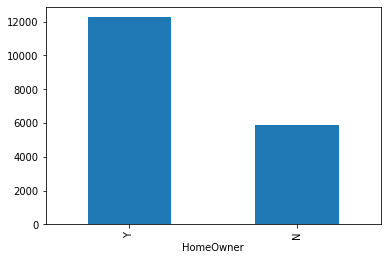

In [25]:
df['HomeOwner'].value_counts().plot(kind='bar')

In [26]:
# For further analysis, We should transform our categorical columns 

In [27]:
# Feature engineering

In [28]:
df['TotalChildren'].unique()

array([2, 3, 0, 5, 4, 1], dtype=int64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BirthDate       18148 non-null  object
 1   MaritalStatus   18148 non-null  object
 2   Gender          18148 non-null  object
 3   EmailAddress    18148 non-null  object
 4   AnnualIncome    18148 non-null  object
 5   TotalChildren   18148 non-null  int64 
 6   EducationLevel  18148 non-null  object
 7   Occupation      18148 non-null  object
 8   HomeOwner       18148 non-null  object
 9   full_name       18148 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [30]:
df.head()

,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,full_name
0,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y,MR. JON YANG
1,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N,MR. EUGENE HUANG
2,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y,MR. RUBEN TORRES
3,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N,MS. CHRISTY ZHU
4,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y,MRS. ELIZABETH JOHNSON


In [31]:
df['MaritalStatus'].unique()

array(['M', 'S'], dtype=object)

In [32]:
df['MaritalStatus']=df['MaritalStatus'].map({'M':0, 'S':1})

In [33]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [34]:
df['Gender']=df['Gender'].map({'M':0, 'F':1})

In [35]:
# df['BirthDate']=df['BirthDate'].str.replace('/','')

In [36]:
df['BirthDate']=pd.to_datetime(df['BirthDate'])

In [37]:
df['Year'] = df['BirthDate'].dt.year
df['Month'] = df['BirthDate'].dt.month
df['Day'] = df['BirthDate'].dt.day
# Add more feature extraction as needed


In [38]:
df.drop('BirthDate', axis=1, inplace=True)

In [39]:
df.drop('full_name',axis=1,inplace=True)

In [40]:
df.head()

,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Year,Month,Day
0,0,0,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y,1966,4,8
1,1,0,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N,1965,5,14
2,0,0,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y,1965,8,12
3,1,1,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N,1968,2,15
4,1,1,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y,1968,8,8


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MaritalStatus   18148 non-null  int64 
 1   Gender          18148 non-null  int64 
 2   EmailAddress    18148 non-null  object
 3   AnnualIncome    18148 non-null  object
 4   TotalChildren   18148 non-null  int64 
 5   EducationLevel  18148 non-null  object
 6   Occupation      18148 non-null  object
 7   HomeOwner       18148 non-null  object
 8   Year            18148 non-null  int32 
 9   Month           18148 non-null  int32 
 10  Day             18148 non-null  int32 
dtypes: int32(3), int64(3), object(5)
memory usage: 1.3+ MB


In [42]:
df['AnnualIncome']=df['AnnualIncome'].str.replace('$','')

In [43]:
df['AnnualIncome']=df['AnnualIncome'].str.replace(',','')

In [44]:
df['AnnualIncome']=df['AnnualIncome'].astype(int)

In [45]:
df.head()

,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Year,Month,Day
0,0,0,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y,1966,4,8
1,1,0,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N,1965,5,14
2,0,0,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y,1965,8,12
3,1,1,christy12@adventure-works.com,70000,0,Bachelors,Professional,N,1968,2,15
4,1,1,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Y,1968,8,8


In [46]:
df.rename(columns={'AnnualIncome': 'AnnualIncome($)'}, inplace=True)

In [47]:
df['EducationLevel'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [48]:
df['EducationLevel']=df['EducationLevel'].map({'Bachelors':3, 'Partial College':2, 'High School':1,
       'Partial High School':0, 'Graduate Degree':4})

In [49]:
df['Occupation'].unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [50]:
df['Occupation']=df['Occupation'].map({'Professional':4, 'Management':3, 'Skilled Manual':2, 'Clerical':1,
       'Manual':0})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MaritalStatus    18148 non-null  int64 
 1   Gender           18148 non-null  int64 
 2   EmailAddress     18148 non-null  object
 3   AnnualIncome($)  18148 non-null  int32 
 4   TotalChildren    18148 non-null  int64 
 5   EducationLevel   18148 non-null  int64 
 6   Occupation       18148 non-null  int64 
 7   HomeOwner        18148 non-null  object
 8   Year             18148 non-null  int32 
 9   Month            18148 non-null  int32 
 10  Day              18148 non-null  int32 
dtypes: int32(4), int64(5), object(2)
memory usage: 1.2+ MB


In [52]:
df.drop('EmailAddress', axis=1, inplace=True)

In [53]:
df.head()

,MaritalStatus,Gender,AnnualIncome($),TotalChildren,EducationLevel,Occupation,HomeOwner,Year,Month,Day
0,0,0,90000,2,3,4,Y,1966,4,8
1,1,0,60000,3,3,4,N,1965,5,14
2,0,0,60000,3,3,4,Y,1965,8,12
3,1,1,70000,0,3,4,N,1968,2,15
4,1,1,80000,5,3,4,Y,1968,8,8


In [54]:
contingency_table=pd.crosstab(df['AnnualIncome($)'],df['Occupation'])
contingency_table

Occupation,0,1,2,3,4
AnnualIncome($),,,,,
10000,1015,84,36,0,0
20000,1153,510,82,0,0
30000,185,1388,585,0,78
40000,0,877,1197,126,488
50000,0,0,519,128,14
60000,0,0,1110,420,1542
70000,0,0,532,420,1361
80000,0,0,397,359,569
90000,0,0,43,187,600


In [55]:
df['HomeOwner'].unique()

array(['Y', 'N'], dtype=object)

In [56]:
df['HomeOwner'] = df['HomeOwner'].map({'Y':0 , 'N':1 })

<Axes: xlabel='HomeOwner'>

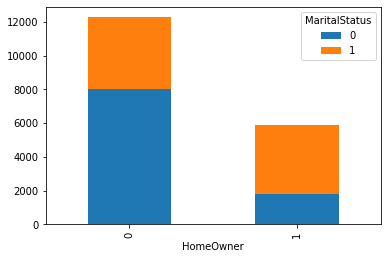

In [57]:
df.groupby(['HomeOwner', 'MaritalStatus']).size().unstack().plot(kind = 'bar', stacked = True)

<Axes: xlabel='HomeOwner'>

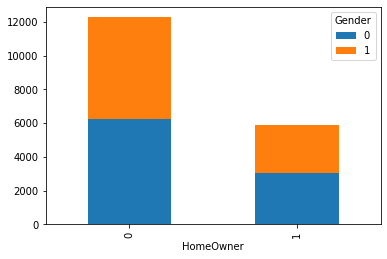

In [58]:
df.groupby(['HomeOwner','Gender']).size().unstack().plot(kind='bar', stacked=True)

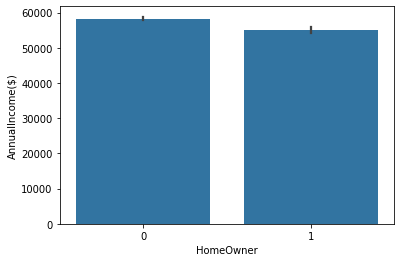

In [59]:
sns.barplot(x='HomeOwner', y='AnnualIncome($)', data=df)
plt.show()

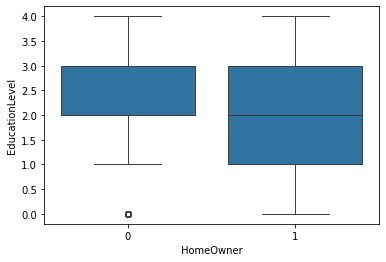

In [60]:
# Create a box plot
sns.boxplot(x='HomeOwner', y='EducationLevel', data=df)
plt.show()

C:\Users\amits\AppData\Local\Temp/ipykernel_4652/3011801725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AnnualIncome($)'])


<Axes: xlabel='AnnualIncome($)', ylabel='Density'>

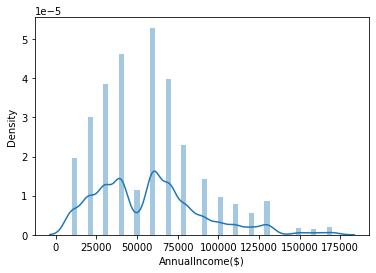

In [61]:
sns.distplot(df['AnnualIncome($)'])

C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2836331933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalChildren'])


<Axes: xlabel='TotalChildren', ylabel='Density'>

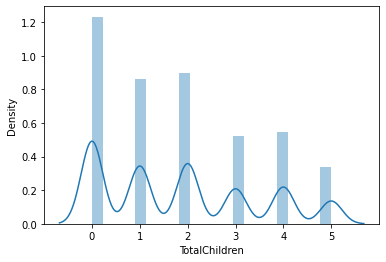

In [62]:
sns.distplot(df['TotalChildren'])

C:\Users\amits\AppData\Local\Temp/ipykernel_4652/1411993376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EducationLevel'])


<Axes: xlabel='EducationLevel', ylabel='Density'>

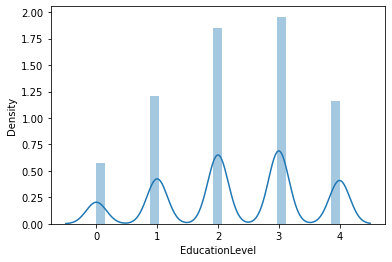

In [63]:
sns.distplot(df['EducationLevel'])

C:\Users\amits\AppData\Local\Temp/ipykernel_4652/1725454351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Occupation'])


<Axes: xlabel='Occupation', ylabel='Density'>

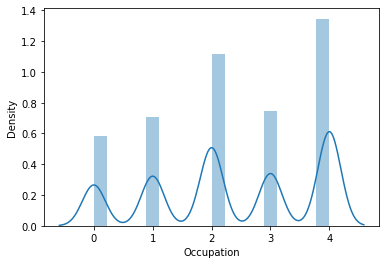

In [64]:
sns.distplot(df['Occupation'])

C:\Users\amits\AppData\Local\Temp/ipykernel_4652/3688478997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HomeOwner'])


<Axes: xlabel='HomeOwner', ylabel='Density'>

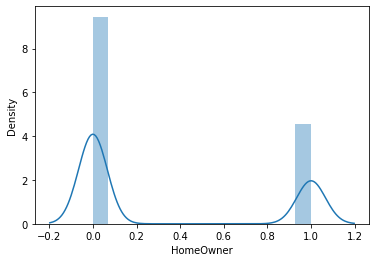

In [65]:
sns.distplot(df['HomeOwner'])

In [66]:
# Correlation

In [67]:
df.corr()

,MaritalStatus,Gender,AnnualIncome($),TotalChildren,EducationLevel,Occupation,HomeOwner,Year,Month,Day
MaritalStatus,1.000000,0.044471,-0.102527,-0.158561,-0.103100,-0.129235,0.323359,0.196937,-0.000624,-0.000155
Gender,0.044471,1.000000,0.002301,0.002702,0.012283,0.016329,-0.003991,-0.000800,0.007746,0.011479
AnnualIncome($),-0.102527,0.002301,1.000000,0.215223,0.251036,0.686995,-0.045679,-0.163500,0.003925,-0.002655
TotalChildren,-0.158561,0.002702,0.215223,1.000000,0.023309,0.262187,-0.186142,-0.517611,-0.003644,-0.004215
EducationLevel,-0.103100,0.012283,0.251036,0.023309,1.000000,0.311983,-0.135072,-0.038517,0.010174,-0.001358
Occupation,-0.129235,0.016329,0.686995,0.262187,0.311983,1.000000,-0.068430,-0.203522,0.007852,0.005015
HomeOwner,0.323359,-0.003991,-0.045679,-0.186142,-0.135072,-0.068430,1.000000,0.110003,-0.004305,-0.003338
Year,0.196937,-0.000800,-0.163500,-0.517611,-0.038517,-0.203522,0.110003,1.000000,0.002524,0.012446
Month,-0.000624,0.007746,0.003925,-0.003644,0.010174,0.007852,-0.004305,0.002524,1.000000,0.012835
Day,-0.000155,0.011479,-0.002655,-0.004215,-0.001358,0.005015,-0.003338,0.012446,0.012835,1.000000


In [68]:
# Matrix plot

In [69]:
# Heatmap

<Axes: >

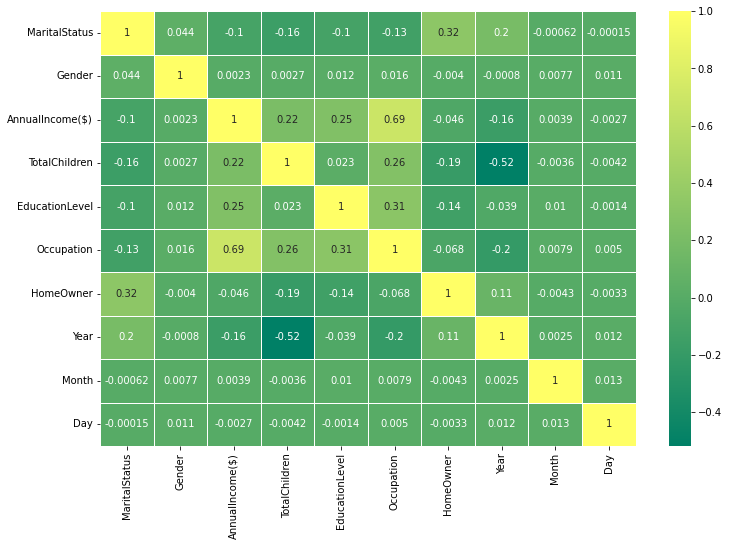

In [70]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'summer')

<Axes: xlabel='MaritalStatus'>

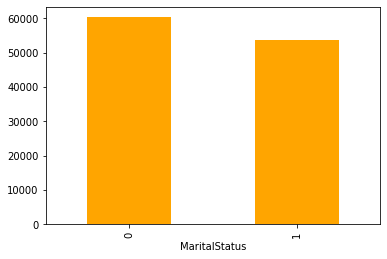

In [71]:
df.groupby('MaritalStatus')['AnnualIncome($)'].mean().plot(kind = 'bar', color = 'orange', )

<Axes: xlabel='Gender'>

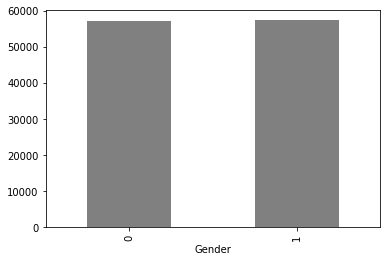

In [72]:
df.groupby('Gender')['AnnualIncome($)'].mean().plot(kind = 'bar', color = 'grey' )

<Axes: xlabel='TotalChildren'>

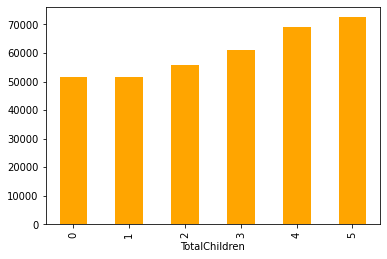

In [73]:
df.groupby('TotalChildren')['AnnualIncome($)'].mean().plot(kind = 'bar', color = 'orange' )

<Axes: xlabel='EducationLevel'>

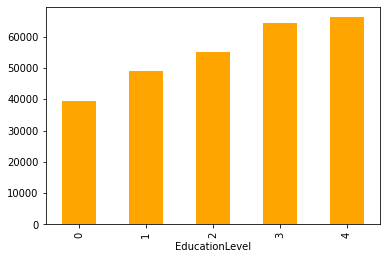

In [74]:
df.groupby('EducationLevel')['AnnualIncome($)'].mean().plot(kind = 'bar', color = 'orange' )

<Axes: xlabel='Occupation'>

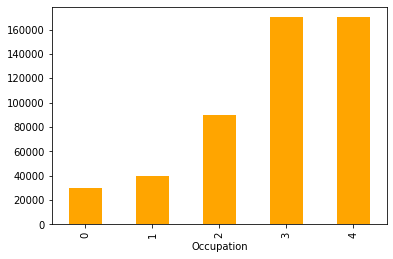

In [75]:
df.groupby('Occupation')['AnnualIncome($)'].max().plot(kind = 'bar', color = 'orange' )

<Axes: xlabel='Year', ylabel='AnnualIncome($)'>

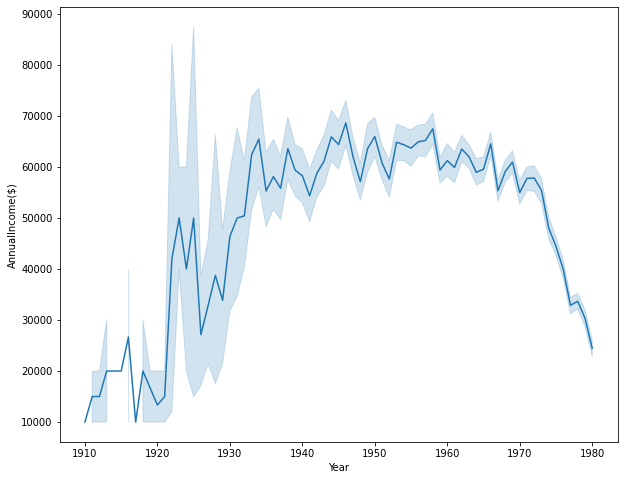

In [76]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df['Year'], y = df['AnnualIncome($)'])

In [77]:
# Pair plot

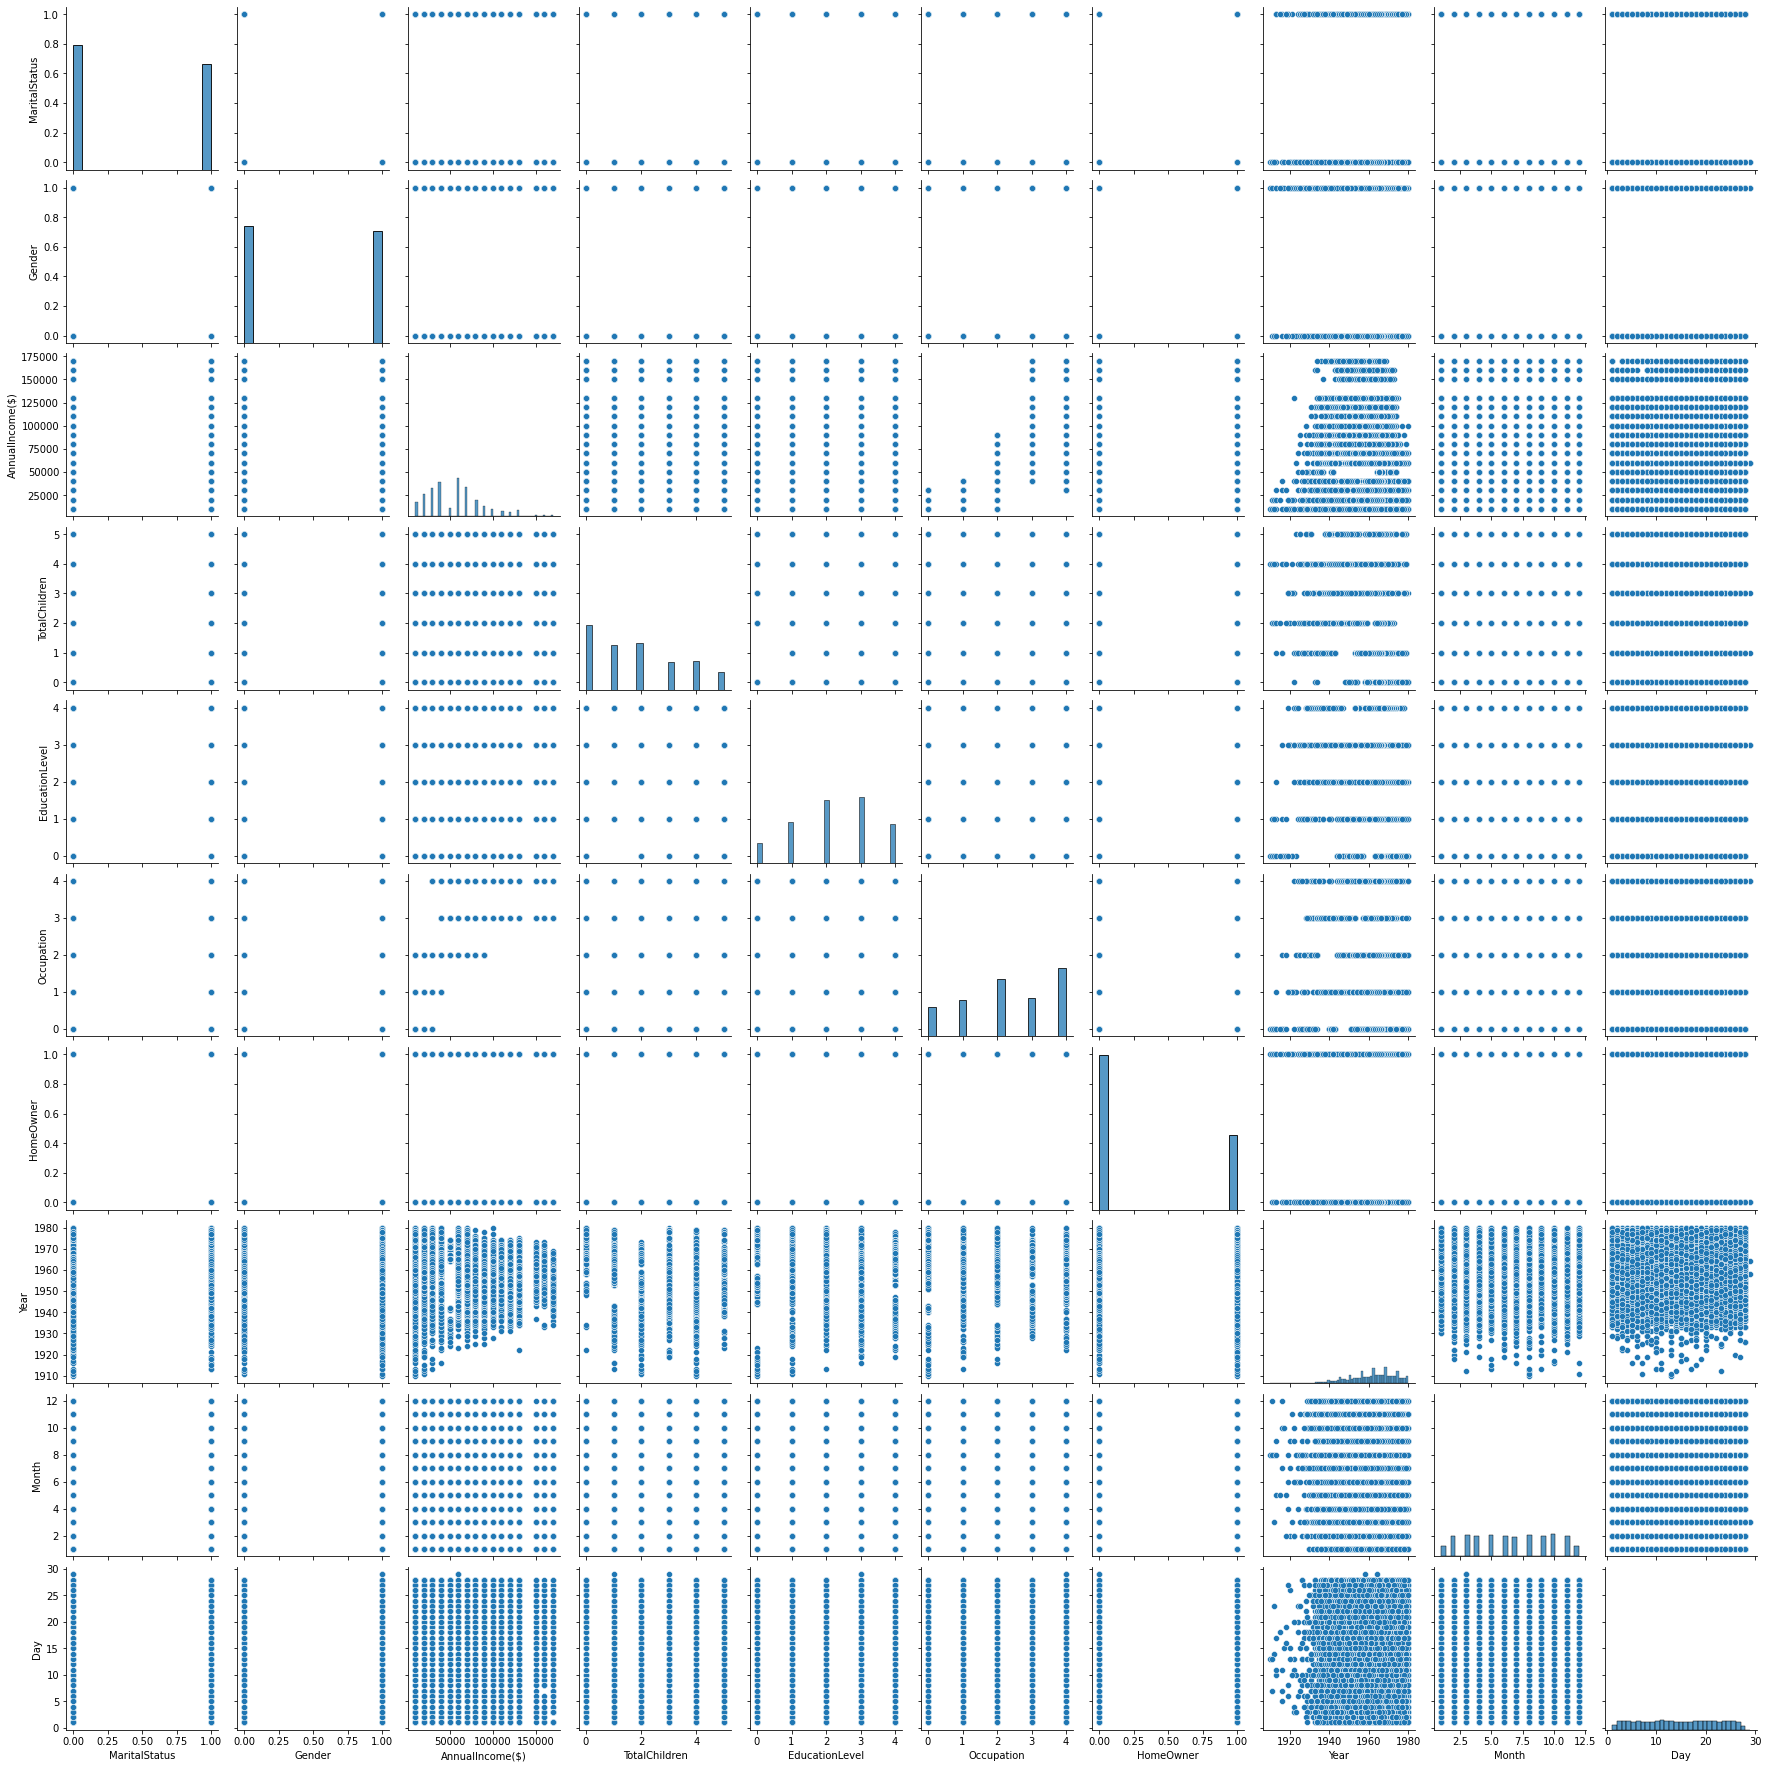

In [78]:
sns.pairplot(df)

In [79]:
# Splitting the data

In [80]:
df.head()

,MaritalStatus,Gender,AnnualIncome($),TotalChildren,EducationLevel,Occupation,HomeOwner,Year,Month,Day
0,0,0,90000,2,3,4,0,1966,4,8
1,1,0,60000,3,3,4,1,1965,5,14
2,0,0,60000,3,3,4,0,1965,8,12
3,1,1,70000,0,3,4,1,1968,2,15
4,1,1,80000,5,3,4,0,1968,8,8


In [81]:
y=df['HomeOwner']

In [82]:
x=df.iloc[:,:6]
print(x)

       MaritalStatus  Gender  AnnualIncome($)  TotalChildren  EducationLevel  \
0                  0       0            90000              2               3   
1                  1       0            60000              3               3   
2                  0       0            60000              3               3   
3                  1       1            70000              0               3   
4                  1       1            80000              5               3   
...              ...     ...              ...            ...             ...   
18143              0       0            30000              1               4   
18144              1       1            30000              3               4   
18145              1       0            30000              3               4   
18146              0       0            30000              3               3   
18147              0       0            30000              0               3   

       Occupation  
0               4  

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [85]:
x_train.shape

(12703, 6)

In [86]:
y_train.shape

(12703,)

In [87]:
# Before Applying Logistic Regression we should apply Standardization

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model=LogisticRegression()

In [91]:
model.fit(scaled_x_train,y_train)

LogisticRegression()

In [92]:
y_pred=model.predict(scaled_x_test)

In [93]:
from sklearn.metrics import accuracy_score , r2_score, confusion_matrix

In [94]:
acc = accuracy_score(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('accuracy score :', acc)
print('r2_score:',r2)

accuracy score : 0.7226813590449954
r2_score: -0.26510495572721204


In [95]:
print(cm)

[[3201  477]
 [1033  734]]


C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

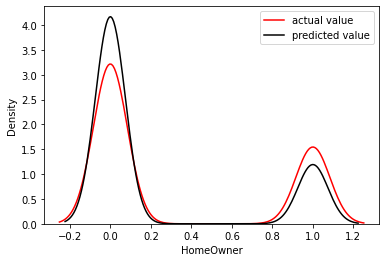

In [96]:
sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
sns.distplot(y_pred, label = 'predicted value', color= 'black', hist = False)
plt.legend()
plt.show()

In [97]:
# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 800, 1000],
    'max_depth': [None, 5,10, 15,20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1,3, 5,8,10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose = 1, n_jobs = -1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 875 candidates, totalling 4375 fits


In [99]:
grid_search.best_estimator_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [106]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 300)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [107]:
acc = accuracy_score(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('accuracy score :', acc)
print('r2_score:',r2)

accuracy score : 0.7616161616161616
r2_score: -0.08748757121451733


In [108]:
print(cm)

[[3286  392]
 [ 906  861]]


C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

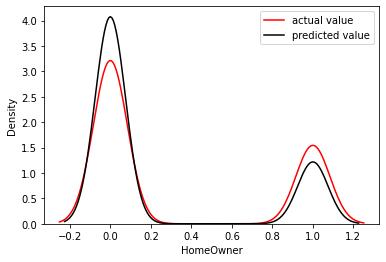

In [109]:
sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
sns.distplot(y_pred, label = 'predicted value', color= 'black', hist = False)
plt.legend()
plt.show()

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5,10, 15,20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1,3, 5,8,10, 15]
    
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs = -1, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [129]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [130]:
dtree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)

In [131]:
acc = accuracy_score(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('accuracy score :', acc)
print('r2_score:',r2)

accuracy score : 0.7632690541781451
r2_score: -0.07994721055124265


C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
C:\Users\amits\AppData\Local\Temp/ipykernel_4652/2942436175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

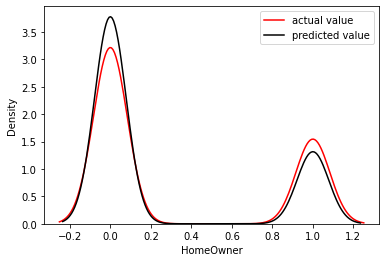

In [132]:
sns.distplot(y_test, label = 'actual value', color = 'red', hist = False)
sns.distplot(y_pred, label = 'predicted value', color= 'black', hist = False)
plt.legend()
plt.show()

In [133]:
import pickle

pickle.dump(rfc, open('cust.pkl', 'wb'))